In [1]:
import argparse
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from models import MyModel
from utils import seed_everything, MyDataset
from IPython.display import Image

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


/home/okuda/anaconda3/envs/grad/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


good 219 good_test 23 bad 86


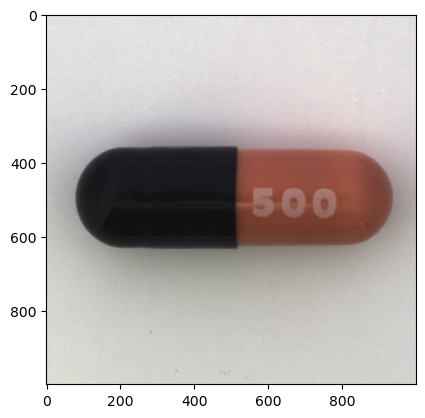

In [3]:
#データセットのありか
datapath = '/auto/proj/proj/okuda/workspace/educ/capsule'
#学習用正常データの読み出し
good_list = glob.glob(os.path.join(datapath,'train/good' , '*'))

#評価用正常データの読み出し
good_test_list = glob.glob(os.path.join(datapath,"test/good/" , '*'))

#評価用異常データの読み出し
bad_test_list = glob.glob(os.path.join(datapath,"test/crack" , '*')) + glob.glob(os.path.join(datapath,"test/faulty_imprint" , '*')) + glob.glob(os.path.join(datapath,"test/poke" , '*'))+ glob.glob(os.path.join(datapath,"test/scratch" , '*'))+ glob.glob(os.path.join(datapath,"test/squeeze" , '*'))

#正常・異常データの数と中身を確認
plt.imshow(mpimg.imread(good_list[0]))
print(f"good {len(good_list)} good_test {len(good_test_list)} bad {len(bad_test_list)}")

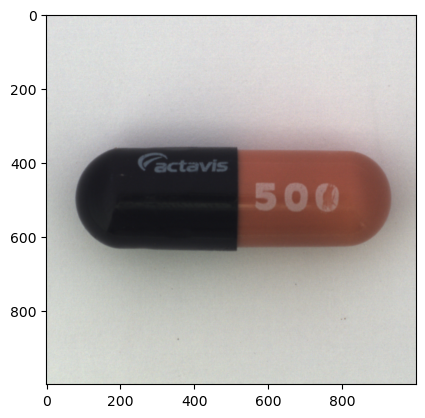

In [3]:
plt.imshow(mpimg.imread(bad_test_list[0]))


In [15]:
good_test_list += good_list[:40]
good_list = good_list[40:]
print(f"good {len(good_list)} good_test {len(good_test_list)} bad {len(bad_test_list)}")

good 179 good_test 63 bad 86
